<a href="https://colab.research.google.com/github/senthilchandrasegaran/designing-intelligence/blob/main/notebooks/paralinguistic-visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/senthilchandrasegaran/designing-intelligence
%cd /content/designing-intelligence/notebooks/
!git pull

import re
import spacy
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
import seaborn as sns
from IPython.display import Markdown, display



Cloning into 'designing-intelligence'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 39 (delta 10), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (39/39), done.
/content/designing-intelligence/notebooks
Already up to date.


In [7]:
def printmd(string):
    display(Markdown(string))

In [8]:
with open('/content/designing-intelligence/data/sample-transcript.txt', 'r') as fo:
    transcript_text = fo.read()

In [ ]:
transcript_text

"INT: Okav so erm what is the Ten >Percent< Founda::tion\n  (1.0)\nRES: The ↑Ten >Percent< Foundation is a charitable trust erm that was sat uo in ↑two >thousand and< ↑two .hh to:oo deal with the donations from the Ten >Percent< group of ↑web↓sites.\n  (1.2)\nINT: So can ↑you tell me erm why and how it was established\n  (2.0)\nRES: .hhh It was es↑tablished because when we set up the Ten Percent companies .hhh we thought >it would be a ↑good idea< to donate ten percent of our profits to ↑CHArity every year\n  (.)\n.hh Erm and we realised quite ↑quick↓ly after ↑trying to donate money to charities .hhh that it was a difficult thing to do .hhh because charities were .hh erm a bit suspicious .hh as to why a company would want to give them any money.\n  (2.0)\nINT: .h So what did you do ↑next?\n  (1.2)\nRES: Well we went through the ↑diffi↓cult erm experience of .hh trying to (0.2) set up a charitable trust .hh er which took for↑ever with the charity comm↑ission¿ .hh and erm but ↑that's now

In [9]:
def get_pauses(transcript_str):
    regex=r"\(.*?\)"
    match_list = []
    for match in re.finditer(regex, transcript_text):
        match_list.append({'start' : match.span()[0], 'end' : match.span()[1], 'match' : match.group()})
    return match_list

In [10]:
pauses_list = get_pauses(transcript_text)
# pauses_list

In [11]:
pauses_df = pd.DataFrame(pauses_list)
pauses_df[0:3]

,start,end,match
0,58,63,(1.0)
1,249,254,(1.2)
2,317,322,(2.0)


In [12]:
def sortnumber(elem):
    elem_no_pars=elem[1:-1]
    if elem_no_pars == '.' :
        elem_num = 0.0
    else :
        elem_num = float(elem_no_pars)
    return elem_num

def pause_timeline(df):
    pause_types = list(set(list(df['match'])))
    pause_types.sort(key=sortnumber)
    fig = plt.figure(figsize=[10, len(pause_types)/3], dpi=300)
    p = sns.stripplot(data = df, x = 'start', y = 'match', order=pause_types,
                      s=10, marker="$\u007C$", jitter=False)
    p.set_ylim([-1,len(pause_types)])

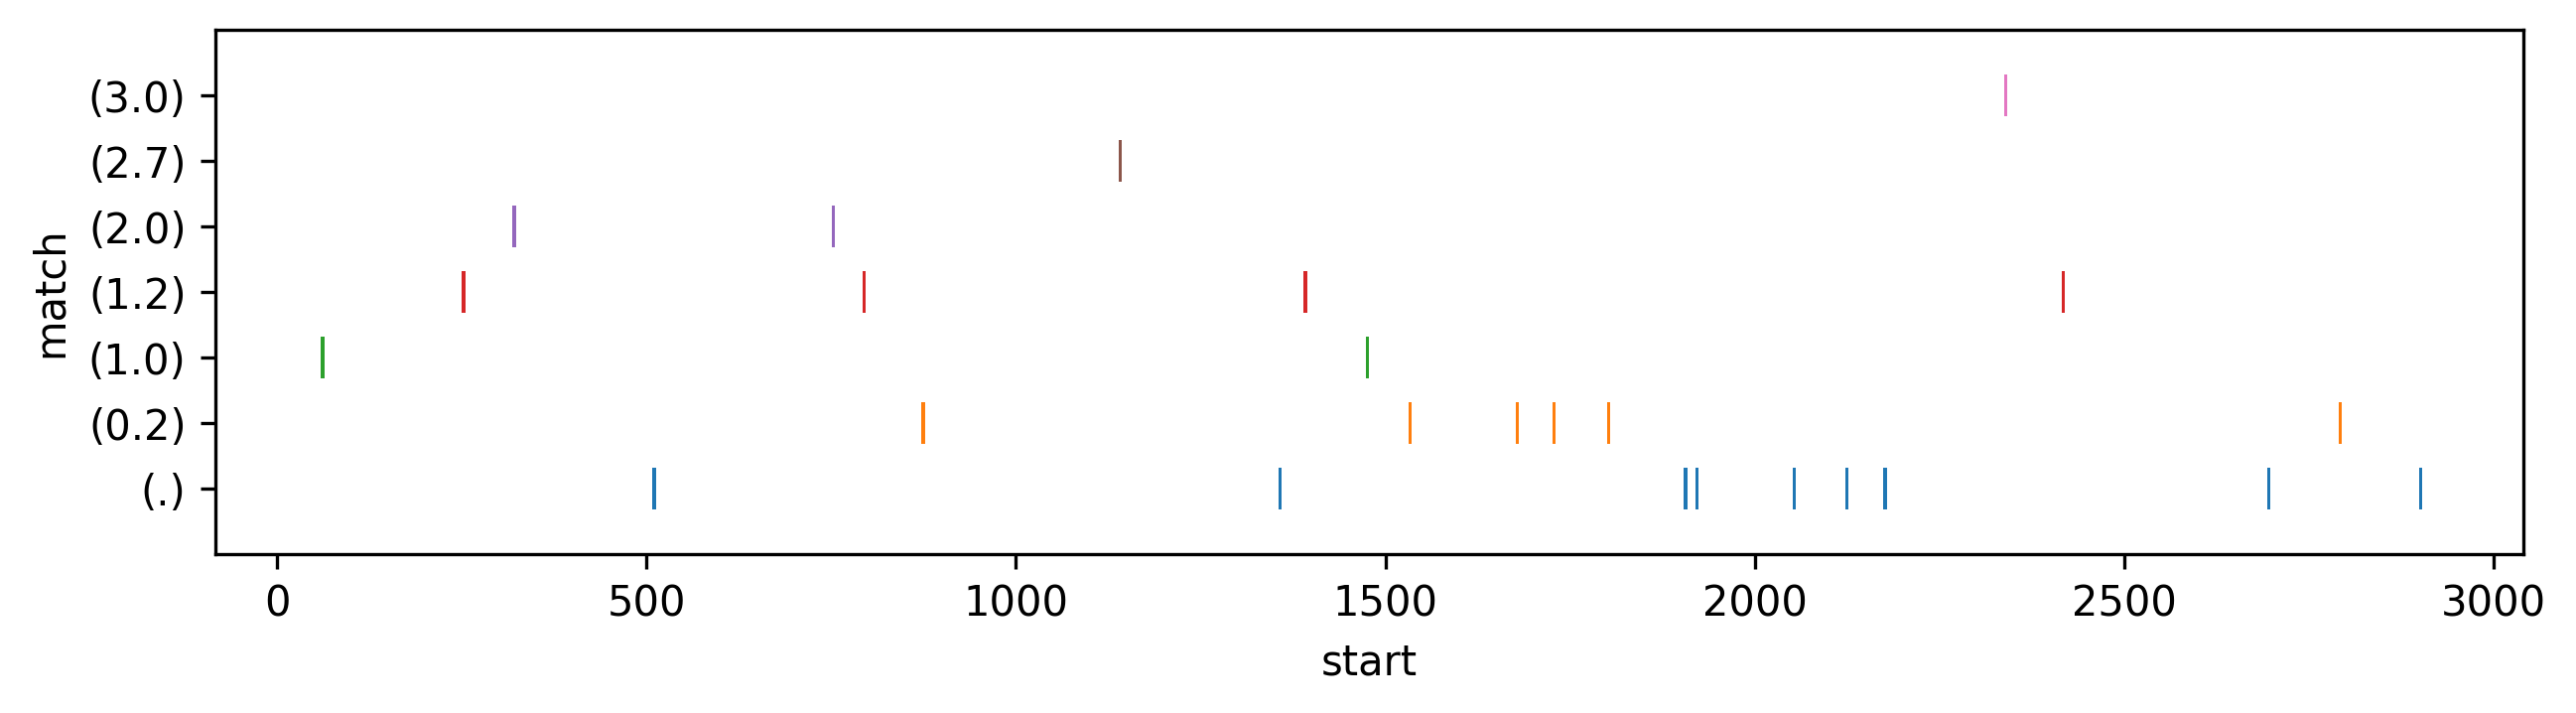

In [13]:
pause_timeline(pauses_df)

In [14]:
def get_intonations(transcript_str):
    regex=r"↑|↓"
    match_list = []
    for match in re.finditer(regex, transcript_text):
        match_list.append({'start' : match.span()[0], 'end' : match.span()[1], 'match' : match.group()})
    plt.savefig('../plots/pauses-timeline.pdf', bbox_inches='tight')
    return match_list

In [15]:
intonations_list = get_intonations(transcript_text)
intonations_df = pd.DataFrame(intonations_list)
intonations_df[0:3]

,start,end,match
0,73,74,↑
1,144,145,↑
2,164,165,↑


<Figure size 432x288 with 0 Axes>

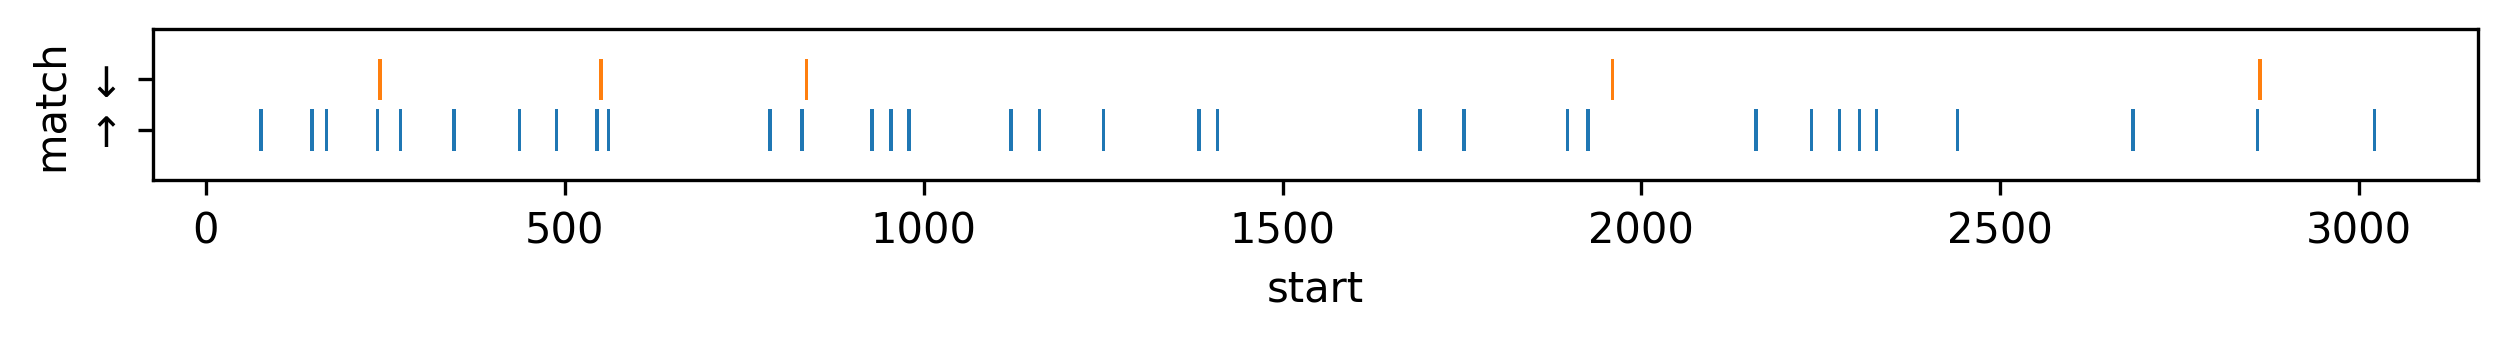

In [16]:
def intonation_timeline(df):
    intonation_types = list(set(list(df['match'])))
    fig = plt.figure(figsize=[10, len(intonation_types)/3], dpi=300)
    p = sns.stripplot(data = df, x = 'start', y = 'match',
                      s=10, marker="$\u007C$", jitter=False)
    p.set_ylim([-1,len(intonation_types)])
    plt.savefig('../plots/intonation-timeline.pdf', bbox_inches='tight')

intonation_timeline(intonations_df)
